<a href="https://colab.research.google.com/github/PetrovES570/PDA_SOL/blob/main/%D0%9F%D0%B5%D1%82%D1%80%D0%BE%D0%B2_%D0%95%D0%B2%D0%B3%D0%B5%D0%BD%D0%B8%D0%B9_5_%D1%81%D0%B0%D0%BC%D0%BE%D1%81%D1%82%D0%BE%D1%8F%D1%82%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) user_id: идентификатор пользователя

2) date_served: дата события

3) marketing_channel: рекламный канал

4) variant: показанный вариант рекламы

5) converted: конверсия в покупку, 1 - пользователь совершил покупку, 0 - нет

6) language_displayed: язык рекламного сообщения

7) language_preferred: предпочитаемый пользователем язык

8) age_group: возрастная группа пользователя

9) date_subscribed: дата подписки на сервис

10) date_canceled: дата отказа от подписки

11) subscribing_channel: с какого рекламного канал пришел пользователь, когда подписался на сервис

12) is_retained: удержание, 1 - пользователь продолжает пользоваться услугами сервиса, 0 - пользователь отвалился

Источник: https://www.kaggle.com/kavitabhagwani/marketing-campaign

Задание 1

Загрузить, посмотреть, определить количество строк и объединить 3 датасета: marketing_campaign.csv, users.csv и subscribers.csv.
Определить типы и статистики колонок.
Определить эффективность маркетинговых каналов по привлечению платящих игроков.
Определить количество игроков в каждой возрастной группе.
Определить самую раннюю дату подписки на сервис.
Определить портрет аудитории удержанных подписчиков (по возрасту и языку).
Проверить гипотезу о том, в каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [5]:
df_campaign = pd.read_csv("marketing_campaign.csv")
df_subscribers = pd.read_csv("subscribers.csv")
df_users = pd.read_csv("users.csv")
print('marketing_campaign', df_campaign.shape)
print('subscribers', df_subscribers.shape)
print('users', df_users.shape)

marketing_campaign (10037, 6)
subscribers (10037, 5)
users (10037, 3)


In [6]:
df_campaign.info()
df_campaign.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   date_served         10021 non-null  object
 2   marketing_channel   10022 non-null  object
 3   variant             10037 non-null  object
 4   language_displayed  10037 non-null  object
 5   converted           10022 non-null  object
dtypes: object(6)
memory usage: 470.6+ KB


,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [7]:
df_subscribers.info()
df_subscribers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   subscribing_channel  1856 non-null   object
 2   date_subscribed      1856 non-null   object
 3   date_canceled        577 non-null    object
 4   is_retained          1856 non-null   object
dtypes: object(5)
memory usage: 392.2+ KB


,user_id,subscribing_channel,date_subscribed,date_canceled,is_retained
0,a1000,House Ads,1/1/18,NaN,True
1,a1001,House Ads,1/1/18,NaN,True
2,a1002,House Ads,1/1/18,NaN,True
3,a1003,House Ads,1/1/18,NaN,True
4,a1004,House Ads,1/1/18,NaN,True


In [8]:
df_users.info()
df_users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             10037 non-null  object
 1   age_group           10037 non-null  object
 2   language_preferred  10037 non-null  object
dtypes: object(3)
memory usage: 235.4+ KB


,user_id,age_group,language_preferred
0,a1000,0-18 years,English
1,a1001,19-24 years,English
2,a1002,24-30 years,English
3,a1003,30-36 years,English
4,a1004,36-45 years,English


In [9]:
df = df_campaign.merge(df_subscribers, left_on='user_id', right_on='user_id')\
.merge(df_users, left_on='user_id', right_on='user_id')
df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
0,a1000,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,0-18 years,English
1,a1001,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,19-24 years,English
2,a1002,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,24-30 years,English
3,a1003,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,30-36 years,English
4,a1004,1/1/18,House Ads,personalization,English,True,House Ads,1/1/18,NaN,True,36-45 years,English


In [10]:
df.describe()

,user_id,date_served,marketing_channel,variant,language_displayed,converted,subscribing_channel,date_subscribed,date_canceled,is_retained,age_group,language_preferred
count,10037,10021,10022,10037,10037,10022,1856,1856,577,1856,10037,10037
unique,10037,31,5,2,4,2,5,31,115,2,7,4
top,a1000,1/15/18,House Ads,control,English,False,Instagram,1/16/18,4/2/18,True,19-24 years,English
freq,1,789,4733,5091,9793,8946,600,163,15,1279,1682,9275


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   language_displayed   10037 non-null  object
 5   converted            10022 non-null  object
 6   subscribing_channel  1856 non-null   object
 7   date_subscribed      1856 non-null   object
 8   date_canceled        577 non-null    object
 9   is_retained          1856 non-null   object
 10  age_group            10037 non-null  object
 11  language_preferred   10037 non-null  object
dtypes: object(12)
memory usage: 1019.4+ KB


In [12]:
df.groupby(['marketing_channel'])['converted'].agg([np.mean])

,mean
marketing_channel,
Email,0.341593
Facebook,0.127419
House Ads,0.062962
Instagram,0.141635
Push,0.083585


<Axes: xlabel='marketing_channel', ylabel='converted'>

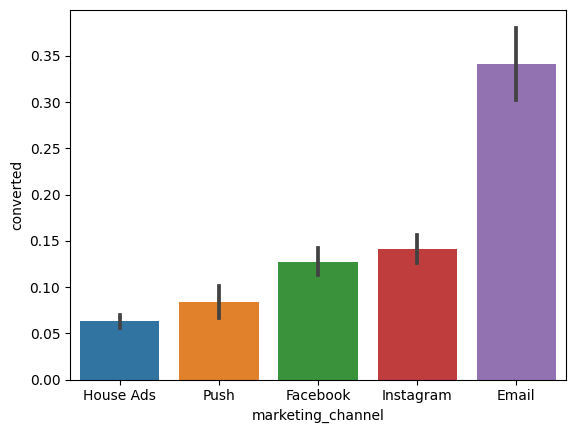

In [13]:
sns.barplot(x='marketing_channel', y='converted', data=df)

Самый эффективный канал - email

In [14]:
df.groupby(['age_group'])['user_id'].agg(['count'])

,count
age_group,
0-18 years,1539
19-24 years,1682
24-30 years,1568
30-36 years,1355
36-45 years,1353
45-55 years,1353
55+ years,1187


In [15]:
df.shape

(10037, 12)

In [16]:
pd.to_datetime(df['date_subscribed'].dropna()).min()

Timestamp('2018-01-01 00:00:00')

Самая рання дата подписки


<Axes: xlabel='age_group', ylabel='count'>

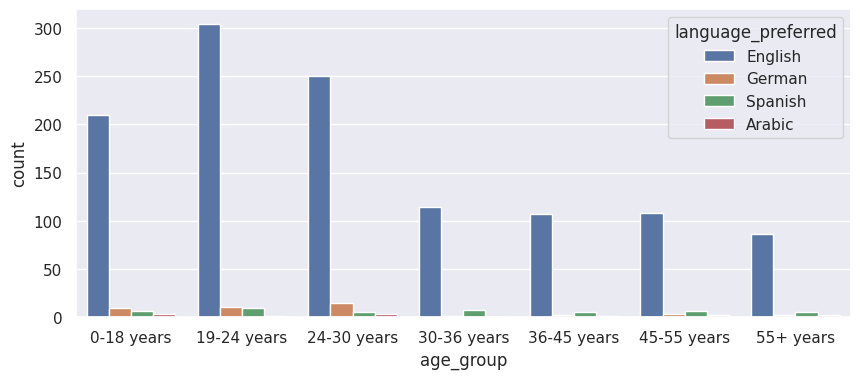

In [24]:
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(hue='language_preferred', x='age_group', data = df[df.is_retained == True])

Портрет аудитории удержанных подписчиков (по возрасту и языку)

In [25]:
df_for_ab = pd.pivot_table(df, values='user_id', index=['variant'],
                       columns=['converted'], aggfunc="count")
df_for_ab

converted,False,True
variant,,
control,4705,371
personalization,4241,705


 В каком варианте теста (control/personalization) больше конверсия (converted) и значимо ли это отличие статистически

In [28]:
import scipy.stats as stats
result = stats.chi2_contingency(df_for_ab, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 126.07767827548582, pvalue = 2.9568009705199523e-29


В данном случае pvalue < 0.5, нулевая гипотеза отвергается.                    
        В control конверсия больше

Задание 2

Цех может производить стулья и столы. На производство стула идет 5 единиц материала, на производство стола - 20 единиц (футов красного дерева). Стул требует 10 человеко-часов, стол - 15. Имеется 400 единиц материала и 450 человеко-часов. Прибыль при производстве стула - 45 долларов США, при производстве стола - 80 долларов США. Сколько надо сделать стульев и столов, чтобы получить максимальную прибыль?

In [29]:
def value(x):
    return - 45*x[0] - 80*x[1]

In [30]:
neq_cons = {'type': 'ineq',
             'fun': lambda x: np.array ([400 - 5 * x [0] - 20 * x [1],
                                         450 - 10 * x [0] - 15 * x [1]])}

In [31]:
from scipy.optimize import Bounds
bnds = Bounds([0, 0], [np.inf, np.inf])

In [32]:
from scipy.optimize import minimize
x0 = np.array([10, 10])
res = minimize(value, x0, method='SLSQP', constraints=neq_cons, bounds=bnds)
print(res.x)

[24. 14.]


In [35]:
print('Кол-во потраченного материала:', 5 * 24 + 20 * 14)
print('Кол-во потраченных ч:', 10 * 24 + 15 * 14)
print('Максимизированная прибыль составляет:', -1*value([24, 14]),'тыс.руб./месяц')

Кол-во потраченного материала: 400
Кол-во потраченных ч: 450
Максимизированная прибыль составляет: 2200 тыс.руб./месяц


Задание 3

Средний накопленный доход на пользователя с сайта (cumulative ARPU) составил: day1 0.4$, day3 0.6$, day7 0.8$, day14 1.10$ , day21 1.30$, day30 1.40$. Подберите аппроксимирующую кривую и сделайте прогноз, сколько в среднем принесет денег пользователь на 90й день. Обоснуйте выбор одной из аппроксимирующей кривой вида: y = ab^x или y = aln(x) + b.

In [36]:
df = pd.DataFrame({'day': [1 ,3 ,7 ,14,21,30],
                   'cum_ARPU': [0.4, 0.6, 0.8, 1.1, 1.3 ,1.4]})
df.head(6)

,day,cum_ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


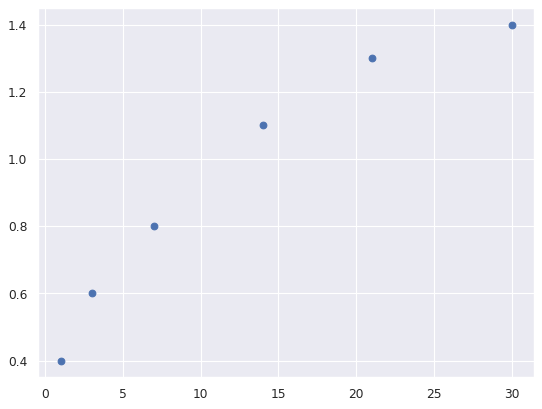

In [37]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cum_ARPU'], label="Original Data" )

In [38]:
def ln_func( x, a, b):
    return a * np.log( x ) + b

In [39]:
def exp_func( x, a, b):
    return a * (b ** x)

In [40]:
from scipy.optimize import curve_fit
log_popt, log_pcov = curve_fit(ln_func, df['day'], df['cum_ARPU'])

In [41]:
exp_popt, exp_pcov = curve_fit(exp_func, df['day'], df['cum_ARPU'])

In [42]:
projection_endpoint = 90

In [43]:
log_y_projected = ln_func( np.arange(1, projection_endpoint + 1), *log_popt )
exp_y_projected = exp_func( np.arange(1, projection_endpoint + 1), *exp_popt )

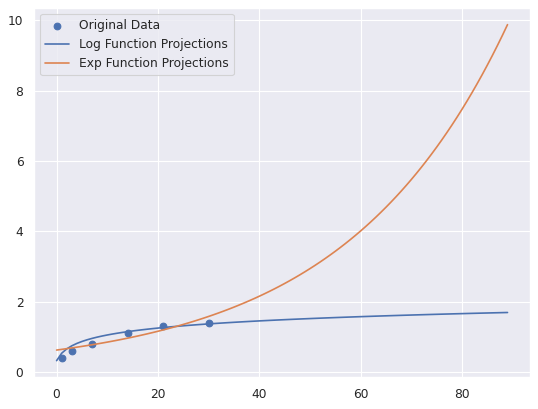

In [44]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df['day'], df['cum_ARPU'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( exp_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [45]:
print('Прогноз кол-ва пользователей через 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз кол-ва пользователей через 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз кол-ва пользователей через 90 дней по log модели 2.0
Прогноз кол-ва пользователей через 90 дней по exp модели 10.0


In [46]:
i = 1
log_y_projected[i - 1] - df[df.day == i].cum_ARPU.iloc[0]

-0.0817084662618659

In [47]:
MSE_log = sum(list([(log_y_projected[i - 1] - df[df.day == i].cum_ARPU.iloc[0])**2 for i in list(df['day'])])) / len(df['day'])
MSE_log


0.004555170184195373

In [48]:
MSE_exp = sum(list([(exp_y_projected[i - 1] - df[df.day == i].cum_ARPU.iloc[0])**2 for i in list(df['day'])])) / len(df['day'])
MSE_exp

0.020240935444654523

Функция y = aln(x) + b дает меньшую среднеквадратичную ошибку, поэтому наиболее подходит для прогнозирования

